<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#подключение-необходходимых-для-работы-библиотек,-модулей" data-toc-modified-id="подключение-необходходимых-для-работы-библиотек,-модулей-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>подключение необходходимых для работы библиотек, модулей</a></span></li><li><span><a href="#Загрузка-и-ознакомление-с-данными" data-toc-modified-id="Загрузка-и-ознакомление-с-данными-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка и ознакомление с данными</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Вывод-по-разделу-1" data-toc-modified-id="Вывод-по-разделу-1-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод по разделу 1</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Шифрование-признаков" data-toc-modified-id="Шифрование-признаков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Шифрование признаков</a></span></li><li><span><a href="#Дешифрование-признаков" data-toc-modified-id="Дешифрование-признаков-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Дешифрование признаков</a></span></li><li><span><a href="#Сравнение-качества-моделей-до-и-после-преобразования" data-toc-modified-id="Сравнение-качества-моделей-до-и-после-преобразования-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Сравнение качества моделей до и после преобразования</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Цель: защитить данные клиентов страховой компании. 
Необходимо разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

## Загрузка данных

### подключение необходходимых для работы библиотек, модулей

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import r2_score

### Загрузка и ознакомление с данными

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


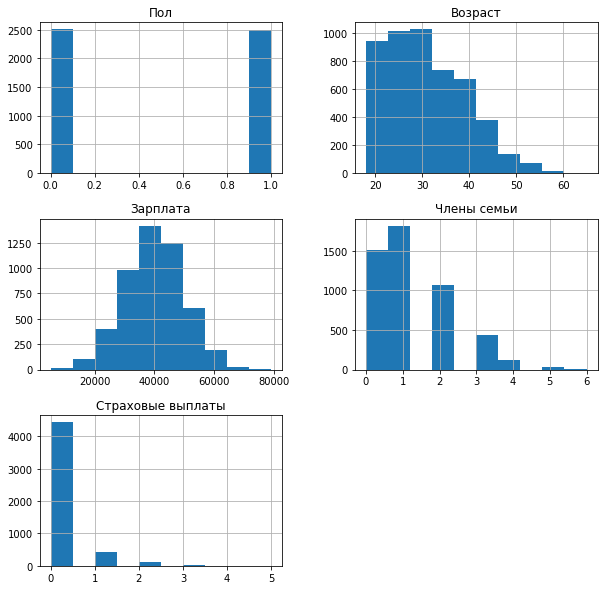

In [4]:
df.hist(figsize=(10,10)) #построим гистограммы для data размером 10 на 10 дюймов
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Аномалии и пропуски в данных не обнаружены. Столбцы 'Зарплата','Возраст' имеют тип float, изучим возможность их преобразования к int

### Предобработка данных

Проверим значения в столбцах Зарплата и Возраст на наличие в них дробной части

In [6]:
def fraction(x): #Функция, которая возвращает 1, если число имеет дробную часть больше 0.001
    count = 0
    if (x - round(x)) >= 0.001:
        count += 1
    return count

print(df['Возраст'].apply(fraction).sum())
print(df['Зарплата'].apply(fraction).sum())

0
0


In [7]:
#Преобразуем столбцы 'Зарплата','Возраст' к int, после округления до ближайшего целого числа
df[['Зарплата','Возраст']] = df[['Зарплата','Возраст']].round().astype(int)

Создадим признаки и целевые признаки из представленных данных

In [8]:
features = df.drop('Страховые выплаты', axis=1) #Признаки
target = df['Страховые выплаты'] #Целевые признаки

Создадим класс LinearRegression и методы fit(), predict()

In [9]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)),\
                            train_features), axis=1) #в обучающую выборку добавим столбец с единицами
        y = train_target
        w = ((np.linalg.inv(X.T.dot(X))).dot(X.T)).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Обучим получившуюся модель на созданных ранее features и target, найдём значение метрики R2 по предсказанным моделью данным и целевым значениям  

In [10]:
model = LinearRegression() 
model.fit(features, target)
predictions = model.predict(features)
r2 = round(r2_score(target, predictions), 5)
print(r2)

0.42495


### Вывод по разделу 1

В разделе 1 было выполнено:

- подключены необходходимые для дальнейшей работы библиотеки, модули;  
- проведено ознакомиление с данными;  
- аномалии и пропуски в данных отсутствуют;  
- данные приведены к типу int;  
- из данных пыли созданы столбцы признаков и целевых признаков (features и target);  
- создадан класс LinearRegression и методы fit(), predict();  
- на полученных признаках было проведено обучение модели и найдено значение метрики R2 = 0.4249455021641366.   

Полученное значение метрики R2 больше нуля и меньше единицы, что говорит о работоспособности созданной модели.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц), содержащая данные о клиентах

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки (данные о клиентах)
  
- $E$ — единичная матрица  
  
- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

- $wp$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу) для зашифрованной матрицы, содержащей данные клиентов

- a - предсказания, полученные для матрицы признаков  

- ap - предсказания, полученные для зашифрованной матрицы признаков 

Задача обучения: $ w = \arg\min_w MSE(Xw, y) $



**Рассмотрим, как преобразуется формула обучения $ w = (X^T X)^{-1} X^Ty $ при домножении матрицы признаков $ X $ на матрицу $ P $:**  
  
$ w_p = ((XP)^T (XP))^{-1} (XP)^T y $  
  
$ w_p = (P^T(X^TX)P)^{-1} (XP)^T y $ 
  
$ w_p = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^T y $  
  
учитывая, что $ (P^T)^{-1}P^T = E $ и $ EX^T = X^T $, получим:  
    
$ w_p = P^{-1}(X^T X)^{-1} X^T y $
  
т.к. $ (X^T X)^{-1} X^T y = w $, следовательно $ w_p = P^{-1}w $ или $ w = Pw_p $
  
 
**Рассмотрим, как преобразуется формула для предсказаний модели $ a = Xw $ при домножении матрицы признаков $ X $ на матрицу $ P $:**
  
$ a_p = XPw_p $ 
  
учитывая, что $ w_p = P^{-1}w $, получаем:
  
$ a_p = XPP^{-1}w $, т.к. $ PP^{-1} = E $ и $ XE = X $ получаем:
  
$ a_p = Xw $, следовательно $ a_p = a $  
  
**Таким образом, предсказания модели при домножении матрицы признаков $ X $ на матрицу $ P $ не изменются. Вектор весов преобразуется по полученной формуле $ w_p = P^{-1}w $ или $ w = Pw_p $**  
  
Определим требования которым должна удовлетворять матрица $ P $:  
1) Для матрицы $ P $ должна существовать обратная матрица $ P^{-1} $ - это означает, что матрица $ P $ должна быть квадратная и невырожденная ($ det(P) $ != 0);  
  
2) Поскольку имеются 4 столбца с признаками, то матрица $ P $ должна иметь размер (4 х 4).

## Алгоритм преобразования

Для шифрования данных домножим признаки на матрицу $ P $ размером 4х4:  
$ X_p = XP $ 
  
Для дешифрования данных домножим зашифрованные признаки на матрицу $ P^{-1} $:     
$ X_pP^{-1} = XPP^{-1} $  
$ X_pP^{-1} = XE $  
$ X_pP^{-1} = X $

In [11]:
# зададим начальные условия для генератора случайных чисел
np.random.seed(12345) 

In [12]:
#создадим матрицу размером 4х4 из целых псевдослучайных чисел до 10
p_matrix = np.random.randint(10, size=(4, 4))

In [13]:
print('матрица - ключ:')
print(p_matrix)

матрица - ключ:
[[2 5 1 4]
 [9 5 2 1]
 [6 1 9 7]
 [6 0 2 9]]


In [14]:
#обратная матрица к p_matrix
p_matrix_inv = np.linalg.inv(p_matrix)

print(p_matrix_inv)

[[-0.11015193  0.11533149 -0.02589779  0.05628453]
 [ 0.18542818  0.01588398 -0.00656077 -0.07907459]
 [-0.00517956 -0.02279006  0.13984807 -0.10393646]
 [ 0.07458564 -0.0718232  -0.01381215  0.09668508]]


## Проверка алгоритма

### Шифрование признаков

Напишем функцию для шифрования признаков (данных о клиентах)

In [15]:
def coding_operation (x, p):
    column=x.columns
    return pd.DataFrame((x.values) @ p, columns=column)

In [16]:
#датафрейм с зашифрованными данными клиентов
features_coding = coding_operation(features, p_matrix)

In [17]:
features_coding.head()

,Пол,Возраст,Зарплата,Члены семьи
0,297977,49810,446485,347254
1,228420,38230,342094,266055
2,126261,21145,189058,147029
3,250401,41805,375346,291939
4,156854,26245,234957,182732


### Дешифрование признаков

Напишем функцию для дешифрования признаков

Использование численных методов даст незначительную погрешность, в связи с чем, данные необходимо будет округлить до ближайшего целого числа и вернуть данным тип int

In [18]:
def decoding_operation (x, p):
    p_inv = np.linalg.inv(p)
    column=x.columns
    return pd.DataFrame((x.values) @ p_inv, columns=column).round().astype(int)

In [19]:
#датафрейм с зашифрованными данными клиентов
features_decoding = decoding_operation(features_coding, p_matrix)
features_decoding.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


Определим имеются ли различия между признаками клиентов до шифрования и после дешифрования:

In [20]:
print(features.compare(features_decoding).shape[0])

0


Различия между признаками и дешифрованными признаками отсутствуют. Алгоритм шифрования/дешифрования реализован  

### Сравнение качества моделей до и после преобразования

In [21]:
model = LinearRegression() 
model.fit(features_coding, target) #обучим модель на зашифрованных данных
predictions = model.predict(features_coding)
r2_coding = round(r2_score(target, predictions), 5)
print(r2_coding)

print('разница значений R2 после шифрования признаков сотавила =', r2-r2_coding )

0.42495
разница значений R2 после шифрования признаков сотавила = 0.0


В разделе 2 был сделан вывод о том, что предсказания модели при домножении матрицы признаков  𝑋  на матрицу  𝑃  не изменются. Таким образом, получено подтверждение сделанному. Отличие результата от 0 на 6 знаке после запятой является погрешностью при использовании численных методов  

## Общий вывод

Для достижения цели работы был реализован метод шифрования данных с использованием разновидности шифра Хилла.
Метод заключается в домножении данных о пользователях на заранее подготовленную матрицу - ключ.  
Для дешифрования данных происходит их умножение на обратную матрицу к матрице ключу.  
  
Достоинствами данного метода является:  
- простота реализации;  
- возможность быстрой смены матрицы, используемой для шифрования данных;  
- предсказания модели при умножении матрицы признаков на матрицу-ключ не изменются;

Недостатками шифра Хилла является никая криптостойкость.
  
В процессе выполнения работы было теоретически установлено:  
-  формула преобразования вектора весов: $ w_p = P^{-1}w $ или $ w = Pw_p $;
- предсказания модели при домножении матрицы признаков $ X $ на матрицу $ P $ не изменются (качества моделей до и после преобразования не измелилось);
- матрица, используемая для шифрования данных, должна быть квадратной и иметь размер равный количеству шифруемых признаков

